['Times New Roman']
None


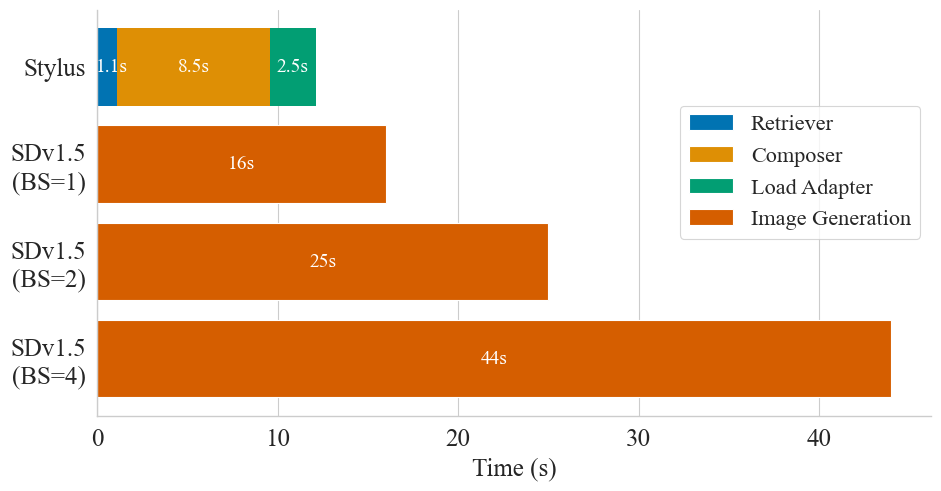

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.patches import Patch
plt.rcParams.update({'font.size': 15})
matplotlib.rc('mathtext', fontset='cm')
# sns.set(style="whitegrid")
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Times New Roman"
sns.set_context("paper")
sns.set_palette("colorblind")


colors = sns.color_palette("colorblind", n_colors=10)
# Data setup
stages_A = ['Retriever', 'Composer', 'Load Adapter', 'Image Generation']
times_A = [1.1, 8.5, 2.5]  # Updated to match the bar lengths correctly

# Create figure and axis
fig, ax = plt.subplots(figsize=(9.5, 5))

ax.grid(
    color='grey',
    linestyle='dotted',
    linewidth=1.5,
    axis='y',
)

# Adding bars for Method A
starting_points = [0, 1.1, 9.6]
ax.barh('SDv1.5\n(BS=4)', [44], color=colors[3])
ax.barh('SDv1.5\n(BS=2)', [25], color=colors[3])
ax.barh('SDv1.5\n(BS=1)', [16], color=colors[3])
ax.barh('Stylus', times_A, left=starting_points, color=colors[:3], edgecolor='none')

# Adding bar for Method B with the same color as image generation for Method A

# Adding labels for each bar segment in Method A
for i, time in enumerate(times_A):
    if i==0:
        starting_points[0] = 0.24
        token = 's'
    else:
        token = 's'
    ax.text(starting_points[i] + time/2, 'Stylus', f'{time}{token}', ha='center', va='center', color='white', fontsize=14, )

# Adding label for Method B
ax.text(8, 'SDv1.5\n(BS=1)', '16s', ha='center', va='center', color='white', fontsize=14)
ax.text(12.5, 'SDv1.5\n(BS=2)', '25s', ha='center', va='center', color='white', fontsize=14)
ax.text(22, 'SDv1.5\n(BS=4)', '44s', ha='center', va='center', color='white', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.tick_params(axis='both', which='major', labelsize=18)

# Adding legend with custom legend elements
legend_elements = [Patch(facecolor=colors[i], label=stages_A[i]) for i in range(len(stages_A))]
# shift it to the right a big more
ax.legend(handles=legend_elements, frameon=True,fontsize=16, loc='center right', bbox_to_anchor=(1, 0.6))

# Adding titles and labels
plt.xlabel('Time (s)', fontsize=18)
plt.tight_layout()
plt.savefig('figures/time.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
